## Basics of ANN: Lab 4
### Tasks:
* Plot the error
* Model XOR with the help of sigmoid and linear


In [5]:
import numpy as np

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

def linear(x):
    return x

def linear_prime(x):
    return 1


In [56]:
import numpy as np
err_arr=[]

class NeuralNetwork:

    def __init__(self, layers):
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime
        #self.activation = linear
        #self.activation_prime = linear_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            err_arr.append(error[0])

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))


[[-0.9594809   0.61051185 -0.82942993]
 [-0.12658541  0.57049549 -0.44476658]
 [-0.85489119  0.07463259 -0.5103058 ]]
[[ 0.24948936]
 [-0.02142831]
 [ 0.54037698]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [0.4879732]
[0 1] [0.49513558]
[1 0] [0.49540361]
[1 1] [0.49813113]


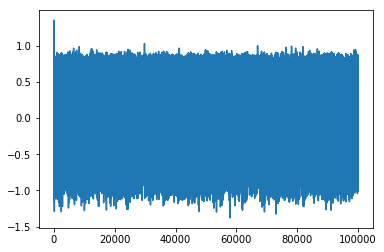

100000

In [35]:
#linear activation
import matplotlib.pyplot as plt
plt.plot(err_arr)
plt.show()
len(err_arr)

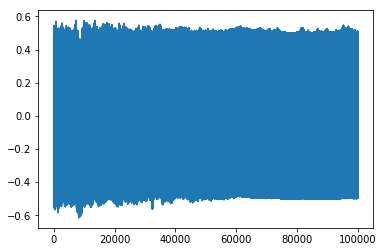

In [57]:
#sygmoid activation
import matplotlib.pyplot as plt
plt.plot(err_arr)
plt.show()
#print(err_arr)

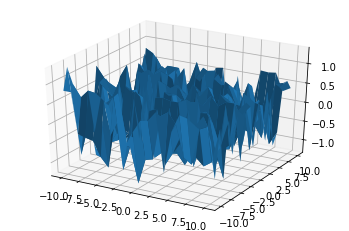

In [55]:
#linear activation 3d 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
synapse_0 = np.empty((2,1))


x_range = np.linspace(-10, 10, 20, dtype=np.float)
y_range = np.linspace(-10, 10, 20, dtype=np.float)


error_surface = np.reshape(np.array(err_arr[0:400]), (x_range.shape[0], y_range.shape[0]))
_X, _Y = np.meshgrid(x_range, y_range, indexing='ij')


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(_X, _Y, error_surface)
plt.show()

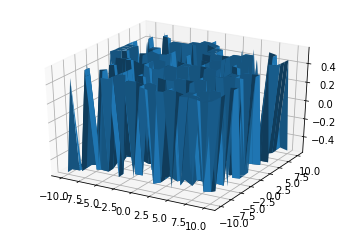

In [58]:
#sigmoid activation 3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
synapse_0 = np.empty((2,1))


x_range = np.linspace(-10, 10, 20, dtype=np.float)
y_range = np.linspace(-10, 10, 20, dtype=np.float)


error_surface = np.reshape(np.array(err_arr[0:400]), (x_range.shape[0], y_range.shape[0]))
_X, _Y = np.meshgrid(x_range, y_range, indexing='ij')


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(_X, _Y, error_surface)
plt.show()